<a href="https://colab.research.google.com/github/NWVData/Portfolio/blob/main/Airlines_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
## Import Libraries ##

import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
## Import Airlines File ##

airlines = pd.read_csv('airlines.csv')
airlines.head(20)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/22,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/22,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/22,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/22,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/22,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,6/10/22,LEC,Inglis Dolley,On Time
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/22,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,4/7/22,STM,Sharyl Eastmead,Cancelled
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/22,VCE,Daryn Bardsley,On Time
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,4/6/22,YVG,Alameda Carlyle,On Time


In [26]:
## Table Info ##

airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [27]:
## Find Null Values ##

nulls = airlines.isnull().sum()
print(nulls)

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


In [28]:
## Find Duplicates ##

duplicates = airlines.duplicated().sum()
print(duplicates)

0


In [29]:
## For Loop to change all Dtypes from Object to String, continuing past age and departure date ##

exclude_columns = ['Age', 'Departure Date']

for i in airlines.columns:
  if i not in exclude_columns:
    airlines[i] = airlines[i].astype('string')
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  string
 1   First Name            98619 non-null  string
 2   Last Name             98619 non-null  string
 3   Gender                98619 non-null  string
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  string
 6   Airport Name          98619 non-null  string
 7   Airport Country Code  98619 non-null  string
 8   Country Name          98619 non-null  string
 9   Airport Continent     98619 non-null  string
 10  Continents            98619 non-null  string
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  string
 13  Pilot Name            98619 non-null  string
 14  Flight Status         98619 non-null  string
dtypes: int64(1), object(1), string(13)
m

In [30]:
## Change Departure Date to Date ##

airlines['Departure Date'] = pd.to_datetime(airlines['Departure Date'])
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  string        
 1   First Name            98619 non-null  string        
 2   Last Name             98619 non-null  string        
 3   Gender                98619 non-null  string        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  string        
 6   Airport Name          98619 non-null  string        
 7   Airport Country Code  98619 non-null  string        
 8   Country Name          98619 non-null  string        
 9   Airport Continent     98619 non-null  string        
 10  Continents            98619 non-null  string        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  string        
 13  Pilot Name      

In [31]:
## Lowercase Columns ##

airlines.columns = [col.lower() for col in airlines.columns]
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   passenger id          98619 non-null  string        
 1   first name            98619 non-null  string        
 2   last name             98619 non-null  string        
 3   gender                98619 non-null  string        
 4   age                   98619 non-null  int64         
 5   nationality           98619 non-null  string        
 6   airport name          98619 non-null  string        
 7   airport country code  98619 non-null  string        
 8   country name          98619 non-null  string        
 9   airport continent     98619 non-null  string        
 10  continents            98619 non-null  string        
 11  departure date        98619 non-null  datetime64[ns]
 12  arrival airport       98619 non-null  string        
 13  pilot name      

In [32]:
## Replace Spaces with Underscores ##

airlines.columns = [col.replace(' ','_') for col in airlines.columns]
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   passenger_id          98619 non-null  string        
 1   first_name            98619 non-null  string        
 2   last_name             98619 non-null  string        
 3   gender                98619 non-null  string        
 4   age                   98619 non-null  int64         
 5   nationality           98619 non-null  string        
 6   airport_name          98619 non-null  string        
 7   airport_country_code  98619 non-null  string        
 8   country_name          98619 non-null  string        
 9   airport_continent     98619 non-null  string        
 10  continents            98619 non-null  string        
 11  departure_date        98619 non-null  datetime64[ns]
 12  arrival_airport       98619 non-null  string        
 13  pilot_name      

In [33]:
## Add Full Name Column ##

airlines['full_name'] = airlines.first_name + ' ' + airlines.last_name
airlines.insert(3, 'full_name', airlines.pop('full_name'))
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   passenger_id          98619 non-null  string        
 1   first_name            98619 non-null  string        
 2   last_name             98619 non-null  string        
 3   full_name             98619 non-null  string        
 4   gender                98619 non-null  string        
 5   age                   98619 non-null  int64         
 6   nationality           98619 non-null  string        
 7   airport_name          98619 non-null  string        
 8   airport_country_code  98619 non-null  string        
 9   country_name          98619 non-null  string        
 10  airport_continent     98619 non-null  string        
 11  continents            98619 non-null  string        
 12  departure_date        98619 non-null  datetime64[ns]
 13  arrival_airport 

In [34]:
## Drop First and Last Name Columns ##

airlines = airlines.drop(['first_name','last_name'], axis=1)
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   passenger_id          98619 non-null  string        
 1   full_name             98619 non-null  string        
 2   gender                98619 non-null  string        
 3   age                   98619 non-null  int64         
 4   nationality           98619 non-null  string        
 5   airport_name          98619 non-null  string        
 6   airport_country_code  98619 non-null  string        
 7   country_name          98619 non-null  string        
 8   airport_continent     98619 non-null  string        
 9   continents            98619 non-null  string        
 10  departure_date        98619 non-null  datetime64[ns]
 11  arrival_airport       98619 non-null  string        
 12  pilot_name            98619 non-null  string        
 13  flight_status   

In [35]:
## Table Descriptives ##

airlines.describe()

,age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


In [36]:
## Table Final Review ##

airlines.head(20)

,passenger_id,full_name,gender,age,nationality,airport_name,airport_country_code,country_name,airport_continent,continents,departure_date,arrival_airport,pilot_name,flight_status
0,ABVWIg,Edithe Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,2022-06-10,LEC,Inglis Dolley,On Time
6,8IPFPE,Rand Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,2022-10-30,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,2022-04-07,STM,Sharyl Eastmead,Cancelled
8,QNAs2R,Aleda Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,2022-08-20,VCE,Daryn Bardsley,On Time
9,3jmudz,Burlie Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,2022-04-06,YVG,Alameda Carlyle,On Time


In [37]:
## Gender Count ##

airlines.gender.value_counts()

Male      49598
Female    49021
Name: gender, dtype: Int64

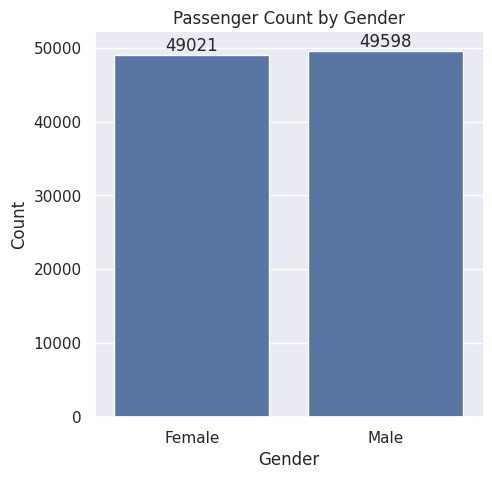

In [38]:
## Count Plot of Genders ##

plt.figure(figsize=(5,5))
gendercount = sns.countplot(data=airlines,x='gender')
gendercount.set(title='Passenger Count by Gender',xlabel='Gender',ylabel='Count')
for labels in gendercount.containers:
  gendercount.bar_label(labels)
sns.despine()
sns.set(style='darkgrid')
plt.show()

In [39]:
## Passengers by Nationality ##

nationals = airlines.groupby('nationality').agg({'passenger_id':'count'}).reset_index()
print(nationals.sort_values(by = 'passenger_id', ascending=False))

        nationality  passenger_id
43            China         18317
96        Indonesia         10559
177          Russia          5693
168     Philippines          5239
29           Brazil          3791
..              ...           ...
45    Cocos Islands             2
48     Cook Islands             2
106          Jersey             1
194    Sint Maarten             1
156  Norfolk Island             1

[240 rows x 2 columns]


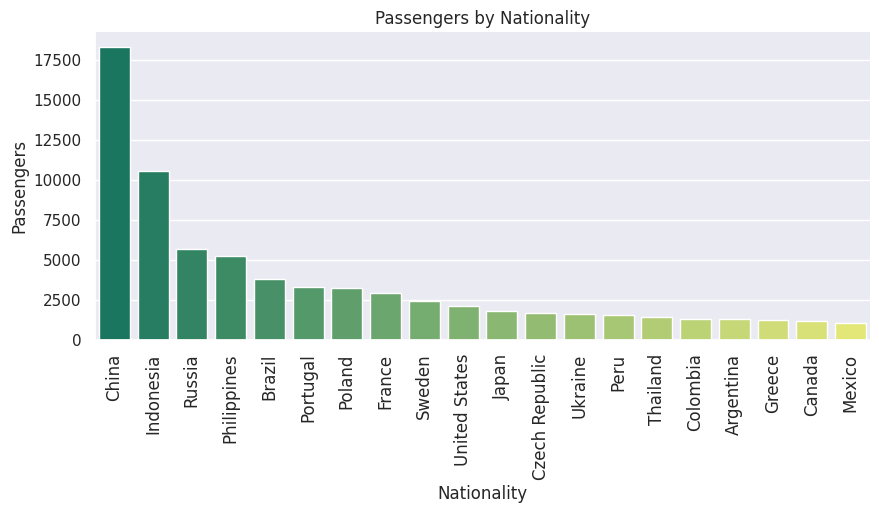

In [40]:
## Plot Top 20 Nationalities by Passenger Count ##

plt.figure(figsize=(10,4))
allnations = sns.barplot(data=nationals.nlargest(20,'passenger_id'), x='nationality',y='passenger_id', palette='summer')
allnations.set(title='Passengers by Nationality',xlabel='Nationality',ylabel='Passengers')
plt.tick_params(axis='x', labelsize=12, labelrotation=90)
sns.despine()
sns.set(style='darkgrid')
plt.show()

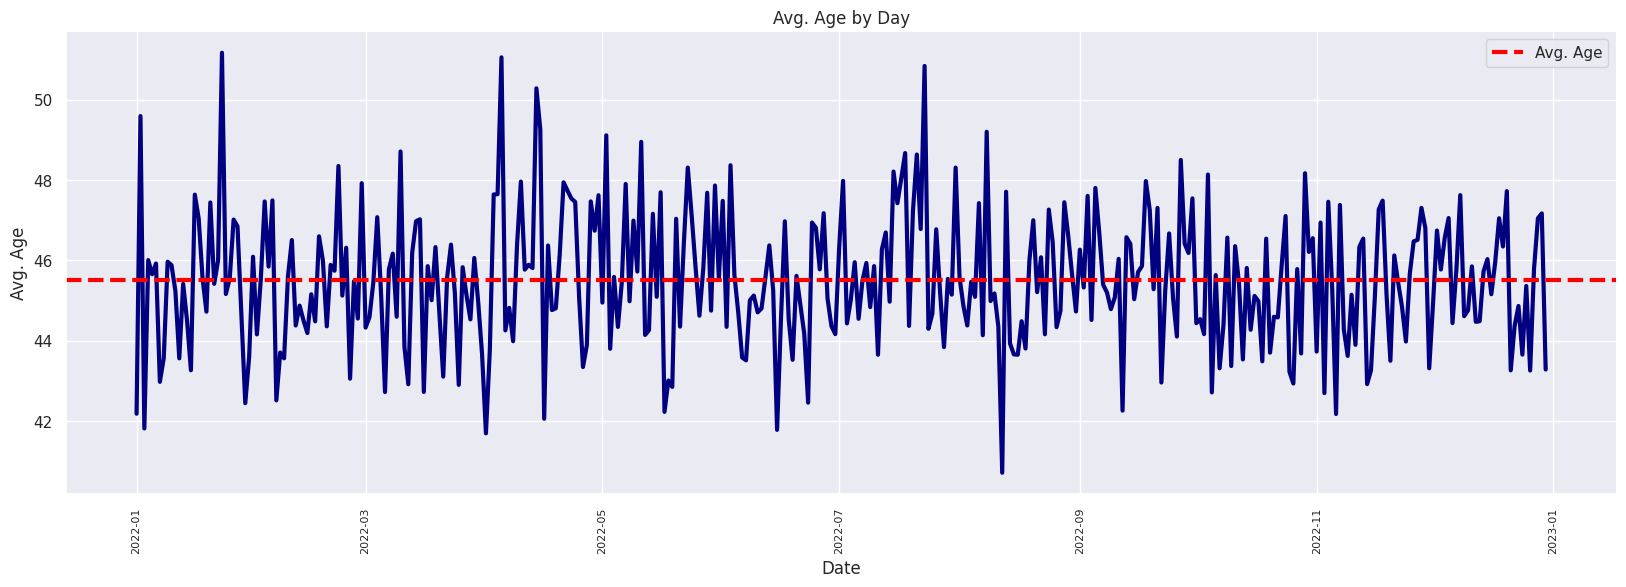

In [41]:
## Time Series by Mean Age ##

plt.figure(figsize=(20,6))
dailyage = sns.lineplot(data=airlines,x=airlines.departure_date,y=airlines.age,estimator='mean',color='navy',linewidth=3,ci=None)
dailyage.set(title='Avg. Age by Day',xlabel = 'Date',ylabel='Avg. Age')
plt.axhline(y=np.mean(airlines.age),linestyle='--',color='red',linewidth=3,label='Avg. Age')
plt.tick_params(axis='x',labelsize=8,labelrotation=90)
plt.legend()
sns.despine()
sns.set(style='darkgrid')
plt.show()

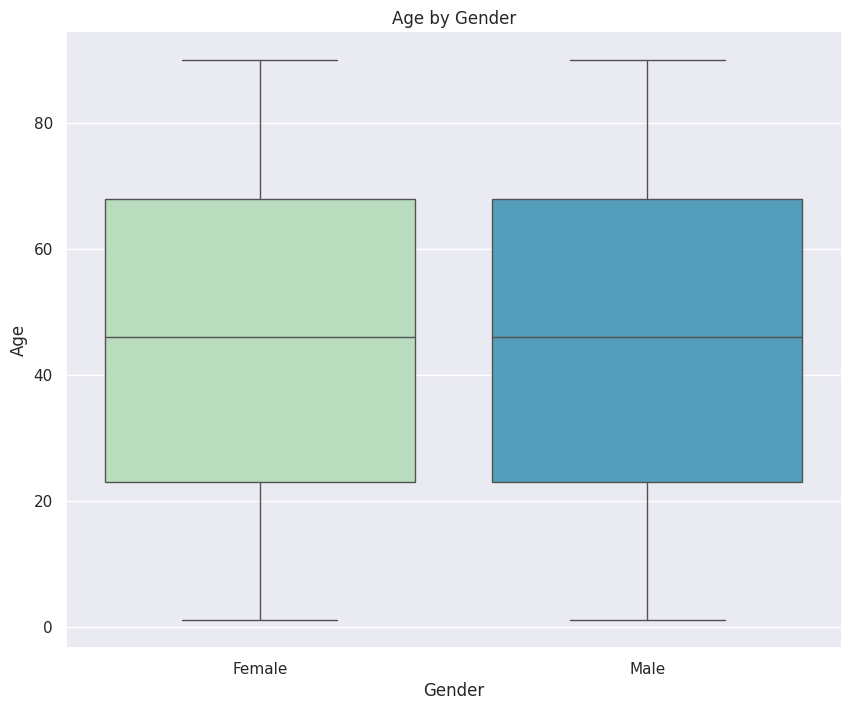

In [42]:
## Box Plot of Age by Gender ##

plt.figure(figsize = (10,8))
times = sns.boxplot(data=airlines,x=airlines.gender,y=airlines.age,palette='GnBu')
times.set(title='Age by Gender',xlabel='Gender',ylabel='Age')
sns.set(style='darkgrid')
sns.despine()
plt.show()

In [43]:
## What Are Most Popular Routes? ##

airlines['route_id'] = airlines.airport_name + ' -> ' + airlines.arrival_airport
pop_routes = airlines.route_id.value_counts().nlargest(10).reset_index()
pop_routes.columns = ['Route', 'Count']
print(pop_routes)

                                      Route  Count
0                 Böblingen Flugfeld -> PHM     36
1             Punta Colorada Airport -> PCO     27
2           Yangzhou Taizhou Airport -> YTY     27
3                     Zaraza Airport -> ZRZ     26
4  Great Falls International Airport -> GTF     25
5             Amchitka Army Airfield -> AHT     25
6            Danilo Atienza Air Base -> SGL     24
7         Lanzhou Zhongchuan Airport -> LHW     24
8                      Sawan Airport -> RZS     24
9                       Heho Airport -> HEH     23


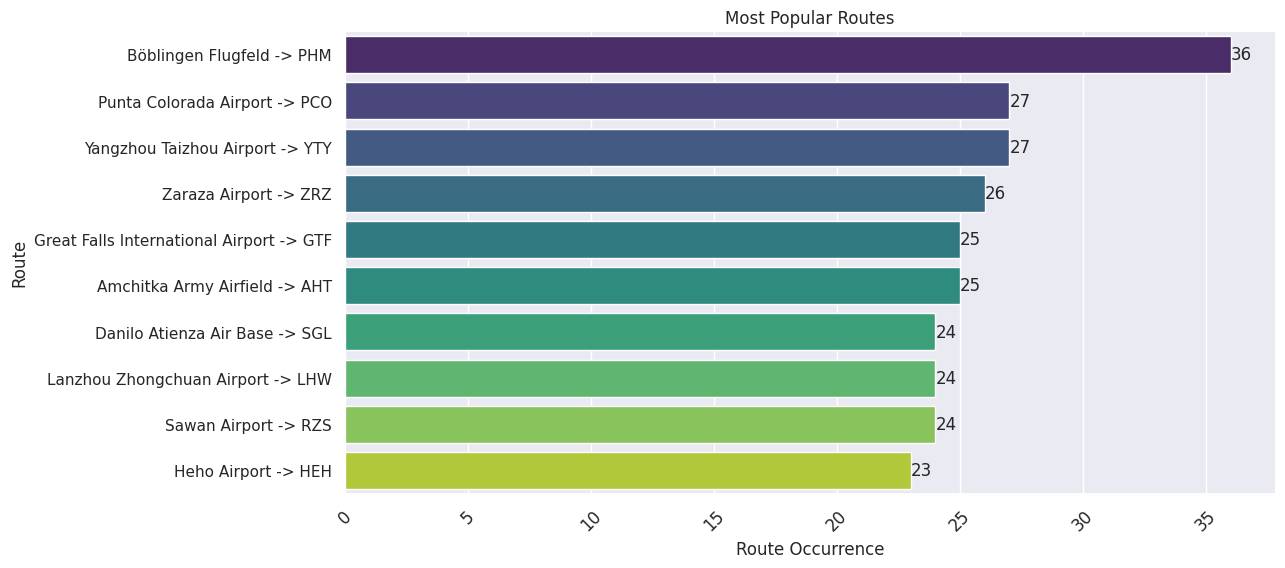

In [44]:
## Visualize Popular Routes ##

plt.figure(figsize=(12, 6))
routes = sns.barplot(data=pop_routes,x='Count',y='Route', palette='viridis')
routes.set(title='Most Popular Routes',xlabel='Route Occurrence',ylabel='Route')
plt.tick_params(axis='x', labelsize=12, labelrotation=45)
for labels in routes.containers:
    routes.bar_label(labels)
sns.despine()
sns.set(style='darkgrid')
plt.show()

In [45]:
## Flight Status Count ##

statuses = airlines.groupby('flight_status').agg({'passenger_id':'count'}).reset_index()
statuses.columns = ['Status','Count']
print(statuses)

      Status  Count
0  Cancelled  32942
1    Delayed  32831
2    On Time  32846


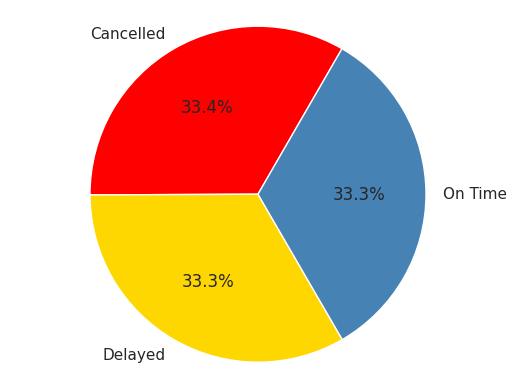

In [46]:
## Visualize in a Pie Chart

plt.pie(statuses['Count'],labels=statuses['Status'],colors=['red','gold','steelblue'],autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.show()